In [1]:
import numpy as np
import pandas as pd 
import sqlalchemy as sa
from sqlalchemy import create_engine

In [2]:
import matplotlib.pyplot as ply
import seaborn as sn
%matplotlib inline

In [3]:
Username= 'Admin'
Password= 'amazing_people'
Host='alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port='1433'
Database='Trinity'


In [4]:
connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database
)


In [5]:
sql_query1= "Select* from claims_data"
sql_query2= "Select* from test_set"

In [6]:
df= pd.read_sql_query(sql_query1, connection)


In [7]:
df['age'] = pd.to_numeric(df['age'])
df['bmi'] = pd.to_numeric(df['bmi'])
df['steps'] = pd.to_numeric(df['steps'])
df['children'] = pd.to_numeric(df['children'])
df['claim_amount'] = pd.to_numeric(df['claim_amount'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age                1338 non-null int64
sex                1338 non-null object
bmi                1338 non-null float64
steps              1338 non-null int64
children           1338 non-null int64
smoker             1338 non-null object
region             1338 non-null object
insurance_claim    1338 non-null object
claim_amount       1338 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 94.2+ KB


In [9]:
df2 = pd.read_sql_query(sql_query2, connection)

In [10]:
df2.head()

,row_id,age,sex,bmi,steps,children,smoker,region
0,1,27,male,28.88,8049,0,no,southwest
1,2,20,female,26.265,7970,3,yes,southwest
2,3,32,female,26.025,2973,0,no,southwest
3,4,19,female,22.085,10427,1,yes,southwest
4,5,20,female,28.685,3972,0,yes,southwest


Logistic Regression(Claims Data)

In [11]:
#Lables
y= df['claim_amount']

#Features

X = df.drop(['insurance_claim','claim_amount','region','sex','smoker'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
age         1338 non-null int64
bmi         1338 non-null float64
steps       1338 non-null int64
children    1338 non-null int64
dtypes: float64(1), int64(3)
memory usage: 41.9 KB


In [12]:
X_transformed = pd.get_dummies(X, drop_first=True)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_standardize = pd.DataFrame(X_scaled,columns=X_transformed.columns)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=47)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
knn = KNeighborsRegressor()

Training

In [18]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [19]:
pred_knn = knn.predict(X_test)

Predicting

In [20]:
pred_knn = knn.predict(X_test)

Testing

In [21]:
from sklearn.metrics import mean_squared_error

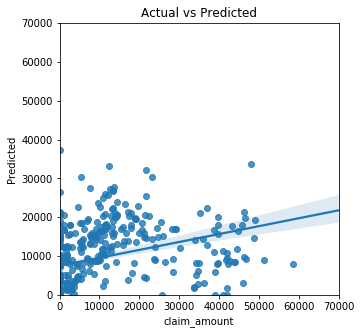

In [22]:
f, ax = ply.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_knn)

In [23]:
print('RMSE:', mean_squared_error(y_test, pred_knn) ** 0.5)

RMSE: 13213.016715387408


Train

In [24]:
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_20 = KNeighborsRegressor(n_neighbors=20)

In [25]:
knn_3.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [26]:
knn_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [27]:
knn_20.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

Predict

In [28]:
pred_knn_3 = knn_3.predict(X_test)
pred_knn_5 = knn_5.predict(X_test)
pred_knn_20 = knn_20.predict(X_test)

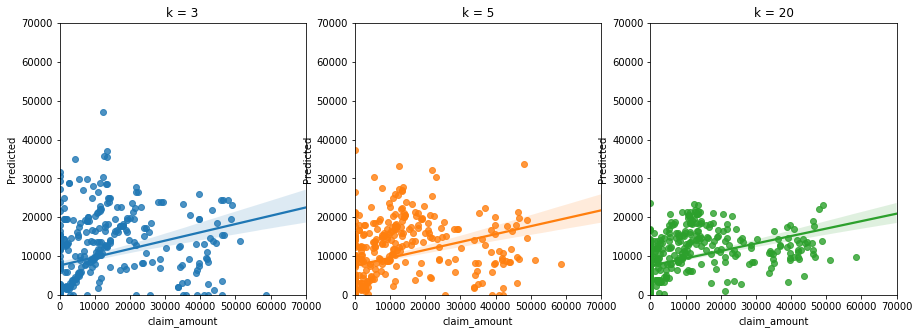

In [29]:

f, ax = ply.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_knn_3, pred_knn_5, pred_knn_20]
title = ['k = 3', 'k = 5', 'k = 20']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sn.regplot(x=y_test, y=pred[i], ax=ax[i])

RMSE

In [30]:
print('RMSE:')
print('k=3:', mean_squared_error(y_test, pred_knn_3) ** 0.5)
print('k=5:', mean_squared_error(y_test, pred_knn_5) ** 0.5)
print('k=20:', mean_squared_error(y_test, pred_knn_20) ** 0.5)

RMSE:
k=3: 13879.775121109655
k=5: 13213.016715387408
k=20: 12373.763555884296


Decision Trees

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
tree = DecisionTreeRegressor(random_state=50)

In [33]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

Predicting

In [34]:
pred_tree = tree.predict(X_test)

Testing

In [35]:
from sklearn.metrics import mean_squared_error

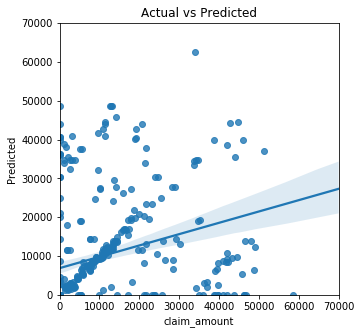

In [36]:
f, ax = ply.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_tree)

RMSE

In [37]:
print('RMSE:', mean_squared_error(y_test, pred_tree) ** 0.5)

RMSE: 15918.254318203992


Train

In [38]:
# max_depth=2 and min_samples_leaf=5
tree_1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=50)

# max_depth=5 and min_samples_leaf=4
tree_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=50)

# max_depth=10 and min_samples_leaf=3
tree_3 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, random_state=50)

In [39]:
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

In [40]:
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

In [41]:
tree_3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

In [42]:
pred_tree_1 = tree_1.predict(X_test)
pred_tree_2 = tree_2.predict(X_test)
pred_tree_3 = tree_3.predict(X_test)

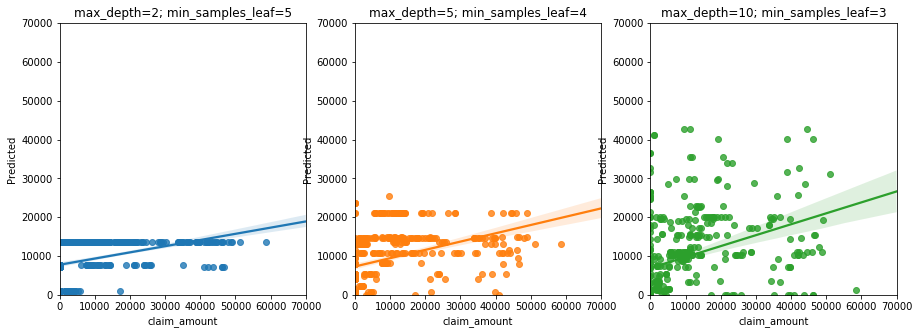

In [43]:
# Create figure and axes
f, ax = ply.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_tree_1, pred_tree_2, pred_tree_3]
title = ['max_depth=2; min_samples_leaf=5', 'max_depth=5; min_samples_leaf=4', 'max_depth=10; min_samples_leaf=3']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sn.regplot(x=y_test, y=pred[i], ax=ax[i])

In [44]:
print('RMSE:')
print('max_depth=2; min_samples_leaf=5:', mean_squared_error(y_test, pred_tree_1) ** 0.5)
print('max_depth=5; min_samples_leaf=4:', mean_squared_error(y_test, pred_tree_2) ** 0.5)
print('max_depth=10; min_samples_leaf=3:', mean_squared_error(y_test, pred_tree_3) ** 0.5)

RMSE:
max_depth=2; min_samples_leaf=5: 12348.177886005848
max_depth=5; min_samples_leaf=4: 12482.319987103678
max_depth=10; min_samples_leaf=3: 13695.274826021068


Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
forest = RandomForestRegressor(n_estimators=100, random_state=50)

In [47]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

Prediciting

In [48]:
pred_forest = forest.predict(X_test)

Testing

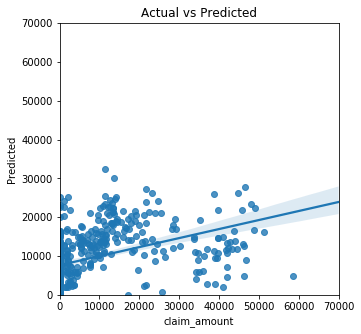

In [49]:
f, ax = ply.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_forest)

RMSE

In [50]:
print('RMSE:', mean_squared_error(y_test, pred_forest) ** 0.5)

RMSE: 12493.669300956904


Train

In [51]:
# 5 trees in forest
forest_1 = RandomForestRegressor(n_estimators=5, random_state=50)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, random_state=50)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, random_state=50)

In [52]:
forest_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

In [53]:
forest_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

In [54]:
forest_3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

Predict

In [55]:
pred_forest_1 = forest_1.predict(X_test)
pred_forest_2 = forest_2.predict(X_test)
pred_forest_3 = forest_3.predict(X_test)

In [56]:
Test

NameError: name 'Test' is not defined

In [ ]:
# Create figure and axes
f, ax = ply.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_forest_1, pred_forest_2, pred_forest_3]
title = ['trees = 5', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sn.regplot(x=y_test, y=pred[i], ax=ax[i])

In [ ]:
RMSE

In [ ]:
print('RMSE:')
print('trees=5:', mean_squared_error(y_test, pred_forest_1) ** 0.5)
print('trees=20:', mean_squared_error(y_test, pred_forest_2) ** 0.5)
print('trees=100:', mean_squared_error(y_test, pred_forest_3) ** 0.5)

Support Vector Machines

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm = SVR(kernel='linear', C=500, gamma=50)

In [ ]:
svm.fit(X_train, y_train)

Predicting

In [ ]:
pred_svm = svm.predict(X_test)

Testing

In [ ]:
f, ax = ply.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_svm)

In [ ]:
print('RMSE:', mean_squared_error(y_test, pred_svm) ** 0.5)

Train

In [ ]:
# kernel=linear, C=100, gamma=20
svm_1 = SVR(kernel='linear', C=100, gamma=20)

# kernel=rbf, C=10, gamma=0.01
svm_2 = SVR(kernel='rbf', C=10, gamma=0.01)

# kernel=poly, C=20, gamma=1
svm_3 = SVR(kernel='poly', C=20, gamma=1)

In [ ]:
svm_1.fit(X_train, y_train)

In [ ]:
svm_2.fit(X_train, y_train)

In [ ]:
svm_3.fit(X_train, y_train)

Predict

In [ ]:
pred_svm_1 = svm_1.predict(X_test)
pred_svm_2 = svm_2.predict(X_test)
pred_svm_3 = svm_3.predict(X_test)

Test

In [ ]:
f, ax = ply.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_svm_1, pred_svm_2, pred_svm_3]
title = ['kernel=linear, C=100, gamma=20', 'kernel=rbf, C=10, gamma=0.01', 'kernel=poly, C=20, gamma=1']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sn.regplot(x=y_test, y=pred[i], ax=ax[i])

RMSE

In [ ]:
print('RMSE:')
print('kernel=linear, C=100, gamma=20:', mean_squared_error(y_test, pred_svm_1) ** 0.5)
print('kernel=rbf, C=10, gamma=0.01:', mean_squared_error(y_test, pred_svm_2) ** 0.5)
print('kernel=poly, C=20, gamma=1:', mean_squared_error(y_test, pred_svm_3) ** 0.5)

Conclusion

The Model that has the highest RMSE IS the Random Forest


In [ ]:
sql_query ='Select* from test_set'

In [ ]:
df1=pd.read_sql_query(sql_query,connection)

In [ ]:
df1.head(25)

In [ ]:
rwid = df1.row_id.values

In [ ]:
X = df1.drop(['region','row_id','sex','smoker'],axis=1)
X.head()

In [ ]:
 prd = tree.predict(X)

In [ ]:
submission = pd.DataFrame({'row_id':rwid,'predictions':prd})

In [ ]:
submission.head()

In [ ]:
submission.to_csv('regression_model_prediction')